### Clustering con Python

In [5]:
from scipy.spatial import distance_matrix
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
data=pd.read_csv('../src/datasets/wine/winequality-red.csv', sep=";")
data.head(10)
data.shape

(1599, 12)

In [7]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


(array([ 10.,   0.,  53.,   0., 681.,   0., 638.,   0., 199.,  18.]),
 array([3. , 3.5, 4. , 4.5, 5. , 5.5, 6. , 6.5, 7. , 7.5, 8. ]),
 <a list of 10 Patch objects>)

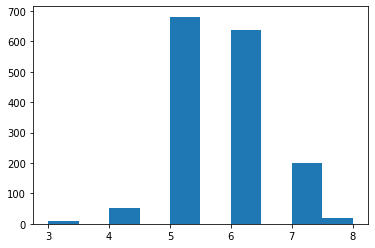

In [9]:
plt.hist(data['quality'])

In [11]:
data.groupby('quality').mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,8.360000,0.884500,0.171000,2.635000,0.122500,11.000000,24.900000,0.997464,3.398000,0.570000,9.955000
4,7.779245,0.693962,0.174151,2.694340,0.090679,12.264151,36.245283,0.996542,3.381509,0.596415,10.265094
5,8.167254,0.577041,0.243686,2.528855,0.092736,16.983847,56.513950,0.997104,3.304949,0.620969,9.899706
6,8.347179,0.497484,0.273824,2.477194,0.084956,15.711599,40.869906,0.996615,3.318072,0.675329,10.629519
7,8.872362,0.403920,0.375176,2.720603,0.076588,14.045226,35.020101,0.996104,3.290754,0.741256,11.465913
8,8.566667,0.423333,0.391111,2.577778,0.068444,13.277778,33.444444,0.995212,3.267222,0.767778,12.094444


## Normalización de los datos 
### Para que todos los datos tengan variables entre 0 y 1

In [15]:
df_norm=(data-data.min())/(data.max()-data.min())
df_norm.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.4
1,0.283186,0.520548,0.00,0.116438,0.143573,0.338028,0.215548,0.494126,0.362205,0.209581,0.215385,0.4
2,0.283186,0.438356,0.04,0.095890,0.133556,0.197183,0.169611,0.508811,0.409449,0.191617,0.215385,0.4
3,0.584071,0.109589,0.56,0.068493,0.105175,0.225352,0.190813,0.582232,0.330709,0.149701,0.215385,0.6
4,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.4


(array([ 10.,   0.,  53.,   0., 681., 638.,   0.,   0., 199.,  18.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

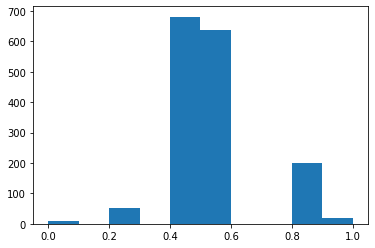

In [28]:
plt.hist(df_norm['quality'])

## Clustering Jerarquico con SciKitLearn

In [19]:
from sklearn.cluster import AgglomerativeClustering

In [22]:
clus=AgglomerativeClustering(n_clusters=6, linkage='ward').fit(df_norm)

In [43]:
md_j=pd.Series(clus.labels_)


Text(0, 0.5, 'Numero de vinos Cluster')

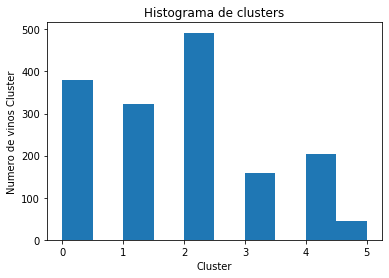

In [44]:
plt.hist(md_j)
plt.title("Histograma de clusters")
plt.xlabel("Cluster")
plt.ylabel("Numero de vinos Cluster")


In [30]:
clus.children_

array([[   0,    4],
       [ 135,  140],
       [ 750,  751],
       ...,
       [3179, 3191],
       [3192, 3193],
       [3194, 3195]], dtype=int64)

In [31]:
from scipy.cluster.hierarchy import dendrogram, linkage

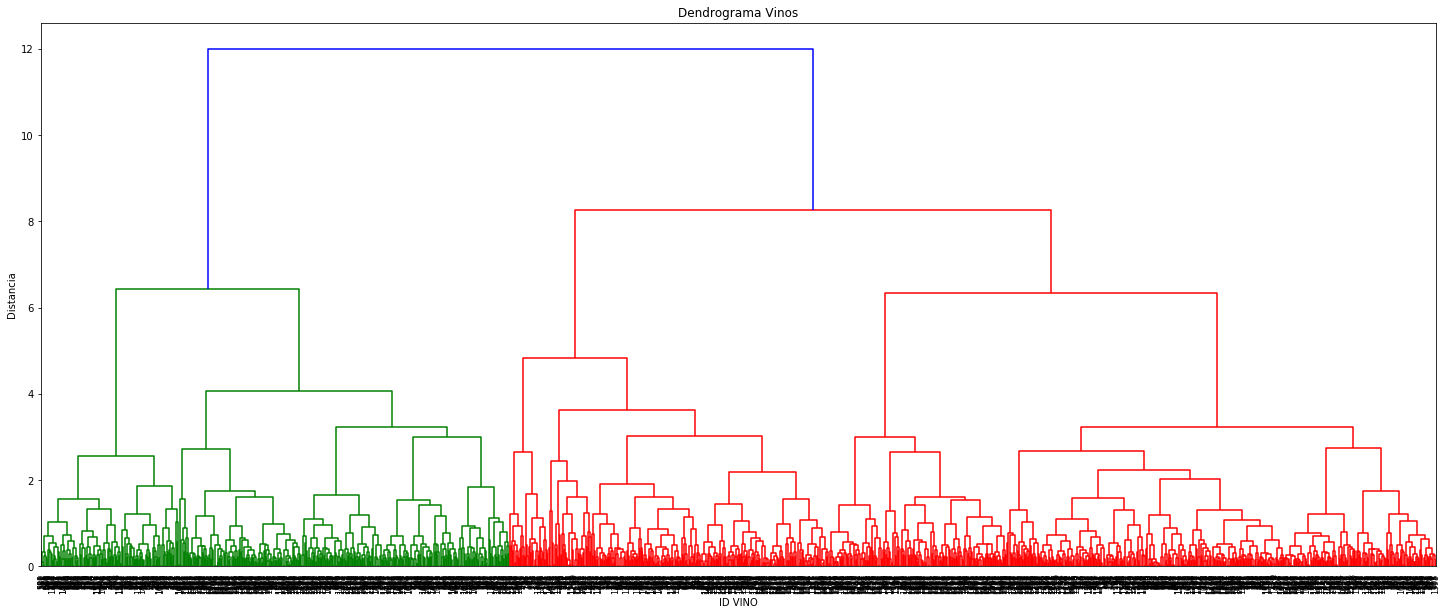

In [35]:
Z= linkage(df_norm, 'ward')
plt.figure(figsize=(25,10))
plt.title("Dendrograma Vinos")
plt.xlabel("ID VINO")
plt.ylabel("Distancia")
dendrogram(Z, leaf_rotation=90., leaf_font_size=8.)
plt.show()

In [36]:
## Clustering con KMEANS

In [41]:
N=6

from sklearn.cluster import KMeans
from sklearn import datasets
model=KMeans(n_clusters=6)
model.fit(df_norm)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

array([[0.36290046, 0.15975098, 0.42329457, 0.10547414, 0.10543412,
        0.16350038, 0.08386063, 0.40849071, 0.41863517, 0.23557536,
        0.49129398, 0.69689922],
       [0.31657408, 0.27714878, 0.30457413, 0.15202455, 0.12698872,
        0.38048163, 0.29785645, 0.5390477 , 0.43592737, 0.17890402,
        0.21400954, 0.45615142],
       [0.57677683, 0.20241599, 0.50726562, 0.13187607, 0.13031485,
        0.13743398, 0.0910032 , 0.65313819, 0.33569144, 0.22445734,
        0.29060497, 0.55      ],
       [0.17610619, 0.32432996, 0.08913043, 0.09416319, 0.09608042,
        0.24856093, 0.12292211, 0.32587627, 0.57733653, 0.18516011,
        0.48637681, 0.61043478],
       [0.33716814, 0.29223744, 0.48133333, 0.07557078, 0.53789649,
        0.20938967, 0.21071849, 0.5143906 , 0.2335958 , 0.59001996,
        0.16512821, 0.46666667],
       [0.26395373, 0.35904298, 0.12348425, 0.09132645, 0.12283596,
        0.14482367, 0.10768343, 0.49211153, 0.48648397, 0.1554293 ,
        0.22016455,

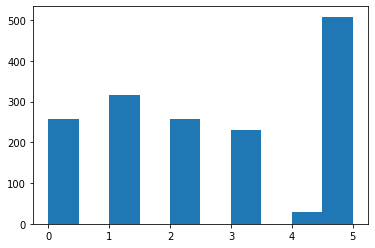

In [51]:
model.labels_
md_k=pd.Series(model.labels_)
df_norm['clust_j']=md_j
df_norm['clustk']=md_k
plt.hist(df_norm['clustk'])
model.cluster_centers_

In [53]:
model.inertia_

186.57050813921404

### Interpretación FINAL

In [56]:
df_norm.groupby("clustk").mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,clust_j
clustk,,,,,,,,,,,,,
0,0.362900,0.159751,0.423295,0.105474,0.105434,0.163500,0.083861,0.408491,0.418635,0.235575,0.491294,0.696899,0.108527
1,0.316574,0.277149,0.304574,0.152025,0.126989,0.380482,0.297856,0.539048,0.435927,0.178904,0.214010,0.456151,1.044164
2,0.576777,0.202416,0.507266,0.131876,0.130315,0.137434,0.091003,0.653138,0.335691,0.224457,0.290605,0.550000,1.972656
3,0.176106,0.324330,0.089130,0.094163,0.096080,0.248561,0.122922,0.325876,0.577337,0.185160,0.486377,0.610435,3.417391
4,0.337168,0.292237,0.481333,0.075571,0.537896,0.209390,0.210718,0.514391,0.233596,0.590020,0.165128,0.466667,4.900000
5,0.263954,0.359043,0.123484,0.091326,0.122836,0.144824,0.107683,0.492112,0.486484,0.155429,0.220165,0.439764,2.005906


### Metodo del CODO